<a href="https://colab.research.google.com/github/ViditPy/KAGGLE_WINE-QUALITY-PREDICTION-PYTHON-ML/blob/master/KAGGLE_WINE_QUALITY_PREDICTION_PYTHON_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WINE QUALITY EXPLORATION

BY: Vidit Agarwal Ph- 9997302747

This Dataset has been brought from(https://archive.ics.uci.edu/ml/datasets/Wine). 

& also available on Kaggle(https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)


Data Set Characteristics:  

Multivariate

Number of Instances:

178

Area:

Physical

Attribute Characteristics:

Integer, Real

Number of Attributes:

13

Date Donated

1991-07-01

Associated Tasks:

Classification

Missing Values?

No

Number of Web Hits:

1426517








In [ ]:
## IMPORTING LIBERARIES:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
## READING FILE

df = pd.read_csv('wine.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Here's the list of all the features:

quality (target)
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This DataSet Contains  ([1599 rows x 12 columns])



Since we have to predict the wine quality, the attribute quality will become our label and the rest of the attributes will become the features.


 Split data into training and test sets.
Splitting the data into training and test sets at the beginning of your modeling workflow is crucial for getting a realistic estimate of your model's performance.

First, let's separate our target (y) features from our input (X) features.

In [ ]:
y = df.quality
X = df.drop('quality', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

Data Preprocessing Steps.
****

Scikit-Learn makes data preprocessing a breeze. For example, it's pretty easy to simply scale a dataset:


In [ ]:
X_train_scaled = preprocessing.scale(X_train)
X_train_scaled

array([[ 0.51358886,  2.19680282, -0.164433  , ...,  1.08415147,
        -0.69866131, -0.58608178],
       [-1.73698885, -0.31792985, -0.82867679, ...,  1.46964764,
         1.2491516 ,  2.97009781],
       [-0.35201795,  0.46443143, -0.47100705, ..., -0.13658641,
        -0.35492962, -0.20843439],
       ...,
       [-0.98679628,  1.10708533, -0.93086814, ...,  0.24890976,
        -0.98510439,  0.35803669],
       [-0.69826067,  0.46443143, -1.28853787, ...,  1.08415147,
        -0.35492962, -0.68049363],
       [ 3.1104093 , -0.62528606,  2.08377675, ..., -1.61432173,
         0.79084268, -0.39725809]])

You can confirm that the scaled dataset is indeed centered at zero, with unit variance:



In [ ]:
X_train_scaled.mean(axis=0)

array([ 1.16664562e-16, -3.05550043e-17, -8.47206937e-17, -2.22218213e-17,
        1.94440936e-17, -6.38877362e-17, -4.16659149e-18, -1.20753377e-13,
       -8.70817622e-16, -4.08325966e-16, -1.17220107e-15])

In [ ]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)

Now, the scaler object has the saved means and standard deviations for each feature in the training set.


In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled.mean(axis=0)


array([ 1.16664562e-16, -3.05550043e-17, -8.47206937e-17, -2.22218213e-17,
        1.94440936e-17, -6.38877362e-17, -4.16659149e-18, -1.20753377e-13,
       -8.70817622e-16, -4.08325966e-16, -1.17220107e-15])

In [ ]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled.mean(axis=0)

array([ 0.02776704,  0.02592492, -0.03078587, -0.03137977, -0.00471876,
       -0.04413827, -0.02414174, -0.00293273, -0.00467444, -0.10894663,
        0.01043391])

In [ ]:
X_test_scaled.std(axis=0)

array([1.02160495, 1.00135689, 0.97456598, 0.91099054, 0.86716698,
       0.94193125, 1.03673213, 1.03145119, 0.95734849, 0.83829505,
       1.0286218 ])

In [ ]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

This is exactly what it looks like: a modeling pipeline that first transforms the data using StandardScaler() and then fits a model using a random forest regressor.

Declaring hyperparameters to tune.


In [ ]:
pipeline.get_params()

{'memory': None,
 'randomforestregressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_impurity_split': None,
 'randomforestregressor__min_sampl

In [ ]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

Tune model using a cross-validation pipeline.


## 6. Validation
Let's try to increase our accuracy of models

### Grid Search CV for SVC

In [ ]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                            

In [ ]:
clf.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'log2'}

Refit on the entire training set.

In [ ]:
clf.refit

True

Evaluate model pipeline on test data.

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
r2_score(y_test, y_pred)

0.47463793207821303

In [ ]:
mean_squared_error(y_test, y_pred)

0.3390021875

Save model for future use.

In [ ]:
joblib.dump(clf, 'rf_regressor.pkl')


['rf_regressor.pkl']

In [ ]:
clf2 = joblib.load('rf_regressor.pkl')


In [ ]:
# Predict data set using loaded model
clf2.predict(X_test)

array([6.46, 5.75, 4.93, 5.53, 6.34, 5.61, 4.92, 4.85, 5.03, 6.02, 5.37,
       5.67, 5.7 , 5.04, 5.69, 5.65, 6.57, 5.59, 5.78, 6.96, 5.48, 5.52,
       5.02, 5.99, 5.91, 5.05, 5.41, 5.14, 5.97, 5.96, 5.87, 6.57, 5.98,
       5.05, 4.97, 5.89, 5.04, 6.1 , 5.09, 5.98, 4.93, 5.81, 6.52, 5.05,
       6.18, 5.38, 5.41, 5.51, 5.17, 6.44, 6.22, 5.24, 5.86, 5.18, 5.69,
       5.78, 5.41, 5.38, 4.98, 5.19, 5.37, 5.13, 5.03, 5.8 , 6.11, 5.2 ,
       6.41, 5.05, 5.22, 6.57, 5.74, 5.8 , 5.04, 5.03, 5.22, 5.99, 5.28,
       5.13, 5.3 , 5.28, 6.23, 5.65, 6.21, 6.38, 5.09, 5.96, 6.48, 6.21,
       5.66, 5.85, 5.9 , 5.39, 6.48, 5.74, 5.72, 5.72, 6.79, 6.78, 5.51,
       6.76, 5.09, 5.37, 5.16, 6.44, 5.08, 4.64, 5.69, 4.99, 5.63, 5.91,
       5.89, 5.63, 6.  , 5.43, 5.21, 5.3 , 5.99, 5.11, 4.81, 5.95, 5.87,
       5.14, 5.76, 6.1 , 5.28, 5.43, 5.28, 5.99, 5.67, 5.43, 5.85, 6.02,
       5.13, 5.27, 5.1 , 6.45, 5.02, 5.23, 6.67, 5.51, 5.22, 5.07, 5.48,
       6.05, 5.28, 5.41, 5.13, 6.57, 5.84, 5.17, 5.

NOW,
LET'S DO SOME GRAPHICAL ANALYSIS  OR VISUALISATION AND PLOTS

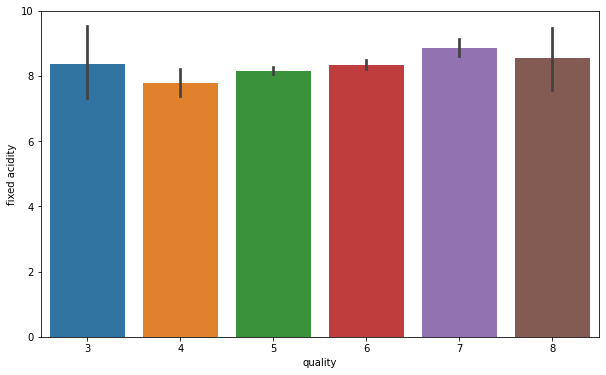

In [ ]:
## Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

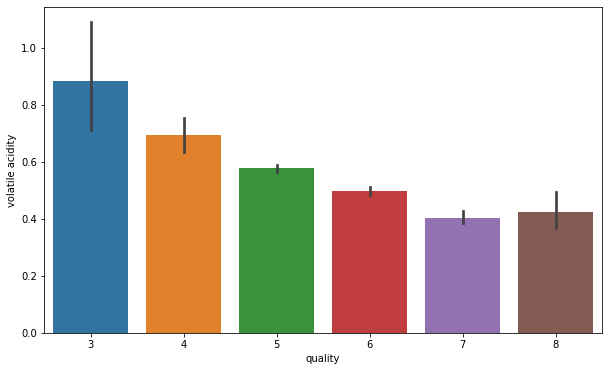

In [ ]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

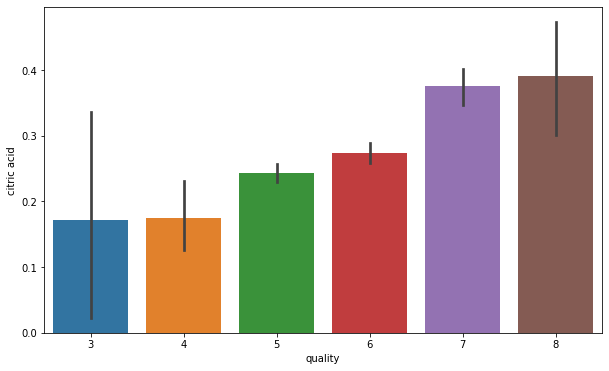

In [ ]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

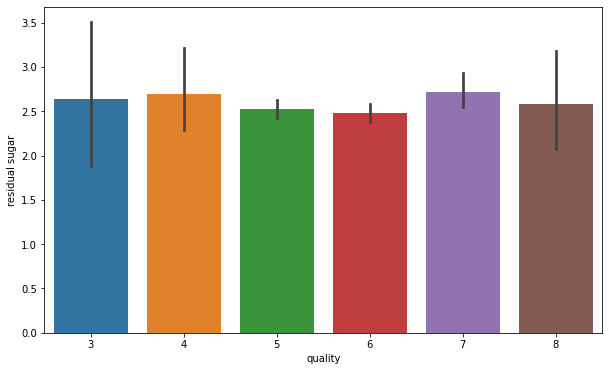

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

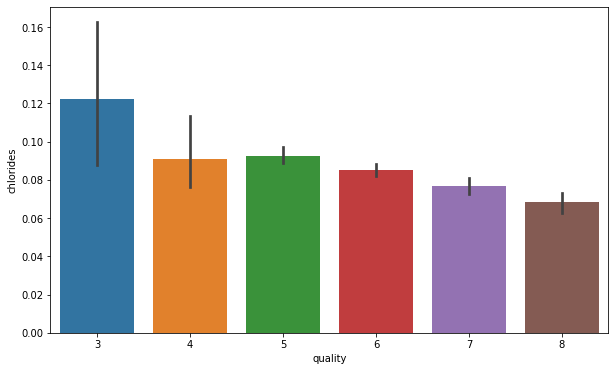

In [ ]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

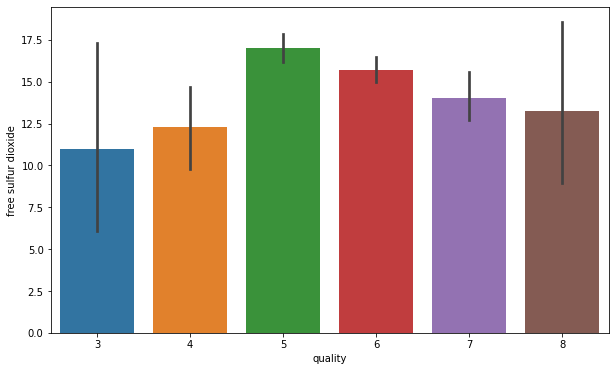

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

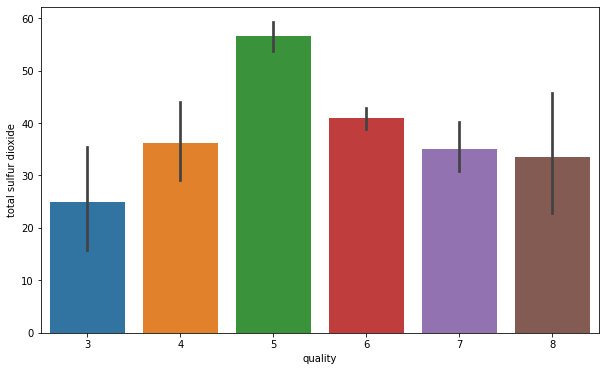

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

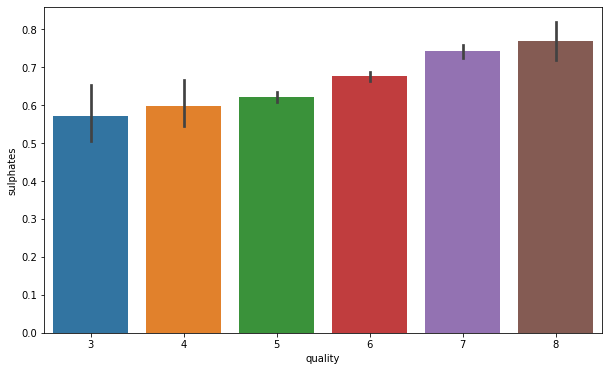

In [ ]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

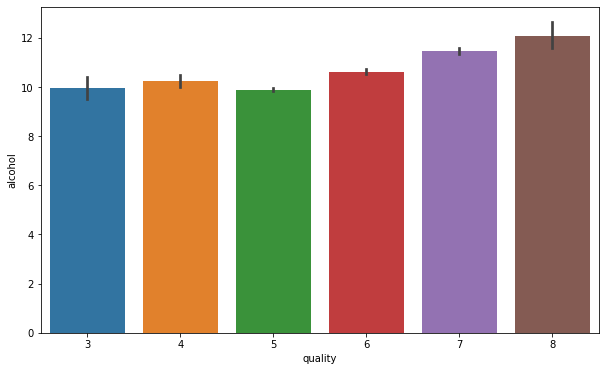

In [ ]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

## NOW,
##  IMPLEMENTING ALL MACHINE LEARNING CONCEPTS IN A "TUTORIAL FORMAT"


## ## Preprocessing Data for performing Machine learning algorithms

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [ ]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [ ]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [ ]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

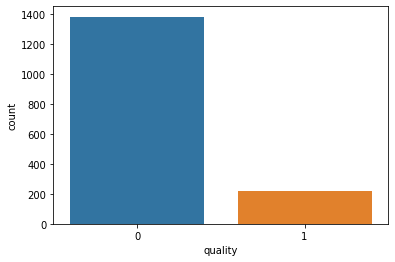

In [ ]:
sns.countplot(df['quality'])

In [ ]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [ ]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Our training and testing data is ready now to perform machine learning algorithm

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.70      0.40      0.51        47

    accuracy                           0.89       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.87      0.89      0.87       320



In [ ]:
##  Random forest gives the accuracy of 87%

In [ ]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 28  19]]


##  ## Stochastic Gradient Decent Classifier

In [ ]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       273
           1       0.50      0.60      0.54        47

    accuracy                           0.85       320
   macro avg       0.71      0.75      0.73       320
weighted avg       0.87      0.85      0.86       320



In [ ]:
#### 84% accuracy using stochastic gradient descent classifier
###   

In [ ]:
print(confusion_matrix(y_test, pred_sgd))

[[245  28]
 [ 19  28]]


##  ## Support Vector Classifier

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



## Support vector classifier gets 86%

## Let's try to increase our accuracy of models
## Grid Search CV

In [ ]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [ ]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



### SVC improves from 86% to 90% using Grid Search CV

## Cross Validation Score for random forest and SGD


In [ ]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.910894438976378

### Random forest accuracy increases from 87% to 91 % using cross validation 
